### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Punjab.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,7544790,4118386,3426404
1,1911,6731510,3782236,2949274
2,1921,7152811,3976180,3176631
3,1931,8012325,4415292,3597033
4,1941,9600236,5228280,4371956


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

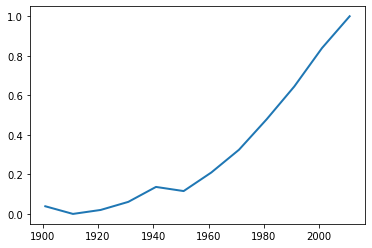

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9030892864169224

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.2606995542056723, 1.528922303320229, 1.8279663152729029, 2.159014524845162]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.260700
13,2031,1.528922
14,2041,1.827966
15,2051,2.159015


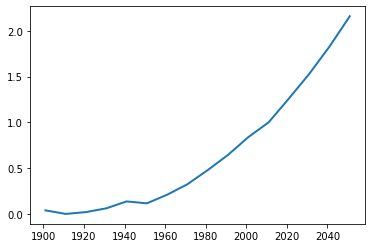

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


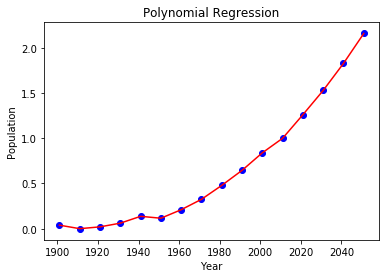

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[7544790.0,
 6731510.0,
 7152811.0,
 8012325.0,
 9600236.0,
 9160500.0,
 11135069.0,
 13551060.0,
 16788915.0,
 20281969.0,
 24358999.0,
 27743338.0,
 33221112.0,
 38856962.0,
 45140424.0,
 52096352.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,7544790.0
1,1911,6731510.0
2,1921,7152811.0
3,1931,8012325.0
4,1941,9600236.0
5,1951,9160500.0
6,1961,11135069.0
7,1971,13551060.0
8,1981,16788915.0
9,1991,20281969.0


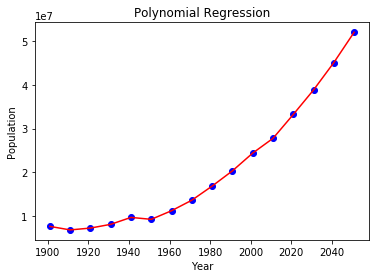

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.030961
1,1911,0.000000
2,1921,0.017863
3,1931,0.058307
4,1941,0.133187
5,1951,0.109233
6,1961,0.204963
7,1971,0.320918
8,1981,0.474796
9,1991,0.644345


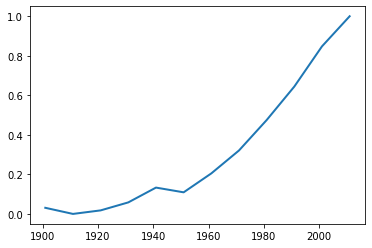

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9778995043480584

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.269870371756241, 1.543953403865288, 1.8504031758297685, 2.190587726987104]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.030961
1,1911,0.000000
2,1921,0.017863
3,1931,0.058307
4,1941,0.133187
5,1951,0.109233
6,1961,0.204963
7,1971,0.320918
8,1981,0.474796
9,1991,0.644345


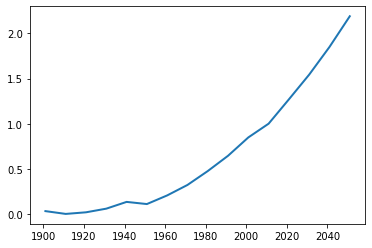

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

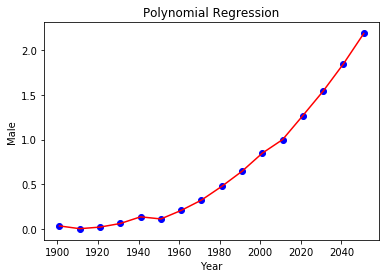

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[4118386.0,
 3782236.0,
 3976180.0,
 4415292.0,
 5228280.0,
 4968206.0,
 6007566.0,
 7266515.0,
 8937210.0,
 10778034.0,
 12985045.0,
 14639465.0,
 17569509.0,
 20545292.0,
 23872487.0,
 27565949.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,4118386.0
1,1911,3782236.0
2,1921,3976180.0
3,1931,4415292.0
4,1941,5228280.0
5,1951,4968206.0
6,1961,6007566.0
7,1971,7266515.0
8,1981,8937210.0
9,1991,10778034.0


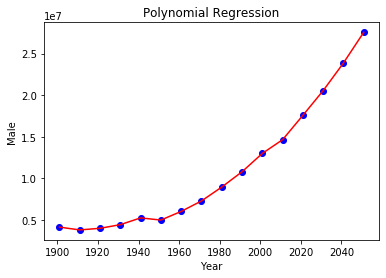

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.046987
1,1911,0.000000
2,1921,0.022390
3,1931,0.063790
4,1941,0.140102


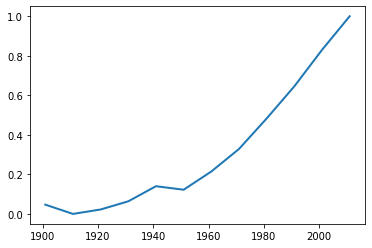

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9844273701900659

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.2508941778366847,
 1.5128511517807368,
 1.8039769749242254,
 2.1252566695007857]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.250894
13,2031,1.512851
14,2041,1.803977
15,2051,2.125257


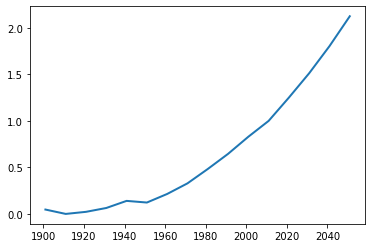

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

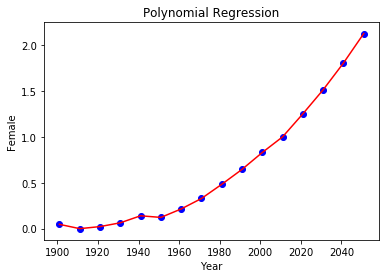

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[3426404.0,
 2949274.0,
 3176631.0,
 3597033.0,
 4371956.0,
 4192294.0,
 5127503.0,
 6284545.0,
 7851705.0,
 9503935.0,
 11373954.0,
 13103873.0,
 15651603.0,
 18311671.0,
 21267937.0,
 24530403.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,3426404.0
1,1911,2949274.0
2,1921,3176631.0
3,1931,3597033.0
4,1941,4371956.0
5,1951,4192294.0
6,1961,5127503.0
7,1971,6284545.0
8,1981,7851705.0
9,1991,9503935.0


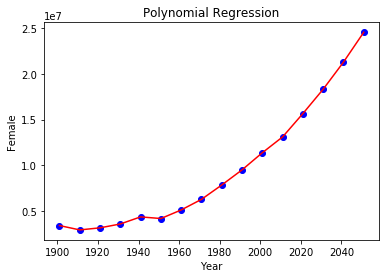

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,7544790.0,1901,4118386.0,1901,3426404.0
1,1911,6731510.0,1911,3782236.0,1911,2949274.0
2,1921,7152811.0,1921,3976180.0,1921,3176631.0
3,1931,8012325.0,1931,4415292.0,1931,3597033.0
4,1941,9600236.0,1941,5228280.0,1941,4371956.0
5,1951,9160500.0,1951,4968206.0,1951,4192294.0
6,1961,11135069.0,1961,6007566.0,1961,5127503.0
7,1971,13551060.0,1971,7266515.0,1971,6284545.0
8,1981,16788915.0,1981,8937210.0,1981,7851705.0
9,1991,20281969.0,1991,10778034.0,1991,9503935.0
